In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.precision", 2)

# Posts

In [2]:
post_col_names = ["title", "author", "created_utc", "score", "domain", "selftext", "id", "upvote_ratio", "num_comments"]
posts = pd.read_csv("reddit_data/democrats_posts.csv", names=post_col_names)
posts.head()

,title,author,created_utc,score,domain,selftext,id,upvote_ratio,num_comments
0,This is President Barack Obama. He did not sel...,BumBiddlyBiddlyBum,1.51e+09,54440,upload.wikimedia.org,'',7gzh5a,0.68,441
1,Join The Battle For Net Neutrality! Don't Let ...,skepticalspectacle1,1.51e+09,30251,battleforthenet.com,'',7ekych,0.91,19
2,Republican ‘pro-life’ congressman slept with p...,skepticalspectacle1,1.52e+09,19737,nova-magazine.net,'',7oj9cv,0.85,861
3,It would not be polite to ask the President to...,VegaThePunisher,1.52e+09,19072,i.imgur.com,'',85y5ja,0.75,80
4,"Brian Klaas: ""The President is openly attempti...",therecordcorrected,1.52e+09,17383,twitter.com,'',89dmy7,0.81,467


In [3]:
print(posts.shape)

(996, 9)


In [4]:
print(posts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         996 non-null    object 
 1   author        962 non-null    object 
 2   created_utc   996 non-null    float64
 3   score         996 non-null    int64  
 4   domain        996 non-null    object 
 5   selftext      996 non-null    object 
 6   id            996 non-null    object 
 7   upvote_ratio  996 non-null    float64
 8   num_comments  996 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 70.2+ KB
None


In [5]:
posts.describe()

,created_utc,score,upvote_ratio,num_comments
count,9.96e+02,996.00,996.00,996.00
mean,1.56e+09,1797.30,0.93,100.22
std,3.09e+07,2590.03,0.06,103.21
min,1.48e+09,841.00,0.50,3.00
25%,1.54e+09,1009.00,0.91,47.00
50%,1.55e+09,1239.00,0.95,71.00
75%,1.59e+09,1725.25,0.96,114.25
max,1.60e+09,54440.00,0.99,1279.00


In [6]:
posts.sort_values(by="score", ascending=False).head(10)

,title,author,created_utc,score,domain,selftext,id,upvote_ratio,num_comments
0,This is President Barack Obama. He did not sel...,BumBiddlyBiddlyBum,1.51e+09,54440,upload.wikimedia.org,'',7gzh5a,0.68,441
1,Join The Battle For Net Neutrality! Don't Let ...,skepticalspectacle1,1.51e+09,30251,battleforthenet.com,'',7ekych,0.91,19
2,Republican ‘pro-life’ congressman slept with p...,skepticalspectacle1,1.52e+09,19737,nova-magazine.net,'',7oj9cv,0.85,861
3,It would not be polite to ask the President to...,VegaThePunisher,1.52e+09,19072,i.imgur.com,'',85y5ja,0.75,80
4,"Brian Klaas: ""The President is openly attempti...",therecordcorrected,1.52e+09,17383,twitter.com,'',89dmy7,0.81,467
5,Man who fueled Trump's voter fraud conspiracy ...,PrestoVivace,1.49e+09,15332,businessinsider.com,'',5r5c79,0.72,336
6,He will stop at nothing.,VegaThePunisher,1.50e+09,14957,i.redd.it,'',6yigso,0.77,433
7,What a REAL President Looks Like.,dr_isk_16,1.52e+09,14053,i.redd.it,'',7wqnk6,0.64,810
8,"Tell them, Mr. President!",VegaThePunisher,1.54e+09,12537,i.imgur.com,'',9eh6xn,0.81,214
9,House Dems vs House GOP: Diversity on Display,Tribat_1,1.55e+09,11691,i.redd.it,'',ac8fg7,0.79,565


In [7]:
posts.sort_values(by="num_comments", ascending=False).head(10)

,title,author,created_utc,score,domain,selftext,id,upvote_ratio,num_comments
16,"Trump: Texas shooting result of ""mental health...",squidzula,1.51e+09,9404,cnn.com,'',7b4roi,0.78,1279
2,Republican ‘pro-life’ congressman slept with p...,skepticalspectacle1,1.52e+09,19737,nova-magazine.net,'',7oj9cv,0.85,861
23,Can we take a break from Donny for a sec and a...,defnotbot,1.60e+09,6836,i.redd.it,'',j3djx8,0.85,855
7,What a REAL President Looks Like.,dr_isk_16,1.52e+09,14053,i.redd.it,'',7wqnk6,0.64,810
21,Can we at least agree on this?,halal_and_oates,1.53e+09,8042,i.redd.it,'',8xqhk5,0.82,740
32,The situation summed up.,VegaThePunisher,1.53e+09,5432,i.imgur.com,'',8yxtxa,0.78,682
71,Senator Kamala Harris Announces Her Bid for Pr...,griffinhazzard,1.55e+09,3017,i.redd.it,'',ai9xph,0.82,642
598,Don’t Be Naive: Avoiding Calling Trump Support...,neroisstillbanned,1.54e+09,1138,theroot.com,'',a089yo,0.82,628
430,"Regarding Politics in General, & Political Dis...",VegaThePunisher,1.52e+09,1334,i.imgur.com,'',87s6eb,0.88,611
419,Kamala Harris is Joe Biden's pick for vice pre...,dolphins3,1.60e+09,1340,latimes.com,'',i7zoj8,0.90,570


In [8]:
posts.sort_values(by="upvote_ratio", ascending=False).head(10)

,title,author,created_utc,score,domain,selftext,id,upvote_ratio,num_comments
993,Maryland Guv Using National Guard To Keep Feds...,jonfla,1.59e+09,843,talkingpointsmemo.com,'',gbhohf,0.99,49
832,The Virginia Senate passed a bill that would e...,mepper,1.58e+09,948,wtvr.com,'',es4nuy,0.99,46
629,"Thank you, John Lewis!",theplantpapi,1.60e+09,1117,i.redd.it,'',htabyj,0.99,36
702,The FBI served a search warrant on Sen. Richar...,DoremusJessup,1.59e+09,1054,thehill.com,'',gjdbv5,0.99,53
351,Top U.S. Marine orders all Confederate symbols...,progress18,1.58e+09,1456,newsweek.com,'',fatkyo,0.99,89
995,Giuliani associate wants to testify that Nunes...,progress18,1.57e+09,844,cnbc.com,'',e1f9oe,0.98,32
431,Trump’s Niece Helped NYT Expose His Massive Ta...,jonfla,1.59e+09,1332,talkingpointsmemo.com,'',h9fgz3,0.98,46
372,My sister is running for office in Glynn Count...,TheThiege,1.59e+09,1431,self.democrats,'This is her website if you are interested: ht...,h7t2qw,0.98,34
374,"How Rep. Katie Porter, at a COVID-19 hearing, ...",anutensil,1.58e+09,1431,azcentral.com,'',fht2wr,0.98,52
375,"Trump campaign chief of staff was arrested, ch...",1000000students,1.59e+09,1424,businessinsider.com,'',gyrnfa,0.98,72


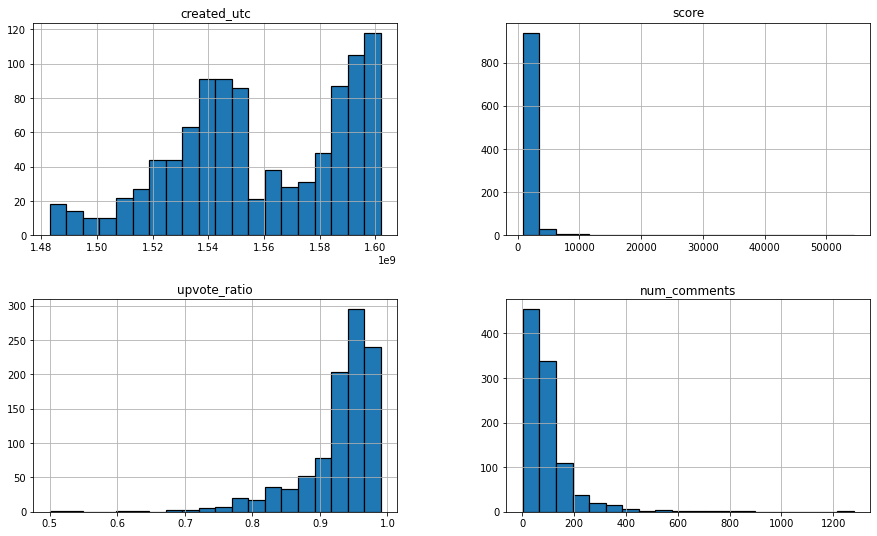

In [9]:
posts.hist(figsize=(15,9), bins=20, edgecolor="black", linewidth=1.2)
plt.show()

# Comments

In [10]:
comment_col_names = ["body", "author", "score", "created_utc", "post_id"]
comments = pd.read_csv("reddit_data/democrats_comments.csv", names=comment_col_names)
comments.head()

,body,author,score,created_utc,post_id
0,'I feel net neutrality is too vital a thing to...,NaN,569,1.51e+09,7gzh5a
1,"'Thanks, Obama '",soda_cookie,5537,1.51e+09,7gzh5a
2,'He also warned 45 about Mike Flynn.',NaN,1584,1.51e+09,7gzh5a
3,"""[To learn about Net Neutrality, why it's impo...",NetNeutralityBot,323,1.51e+09,7gzh5a
4,"""The same people on the internet begging and s...",cyclostationary,967,1.51e+09,7gzh5a


In [11]:
print(comments.shape)

(84986, 5)


In [12]:
comments.describe()

,score,created_utc
count,84986.00,8.50e+04
mean,9.74,1.55e+09
std,49.53,3.26e+07
min,-797.00,1.48e+09
25%,1.00,1.53e+09
50%,2.00,1.55e+09
75%,7.00,1.59e+09
max,5537.00,1.60e+09


In [13]:
comments.sort_values(by="score", ascending=False).head(5)

,body,author,score,created_utc,post_id
1,"'Thanks, Obama '",soda_cookie,5537,1.51e+09,7gzh5a
4402,'I seem to remember something about the NSA be...,Bravot,5217,1.50e+09,6w589t
3006,'2018 Russia Investigation Current Tally:\n\nG...,Jeffylew77,3798,1.54e+09,9eh6xn
330,"'Ah religion, the shield of the wicked. '",Eternius00,2687,1.52e+09,7oj9cv
326,'I feel like Im being punked by these headlines',JuanFromTheBay,2119,1.52e+09,7oj9cv


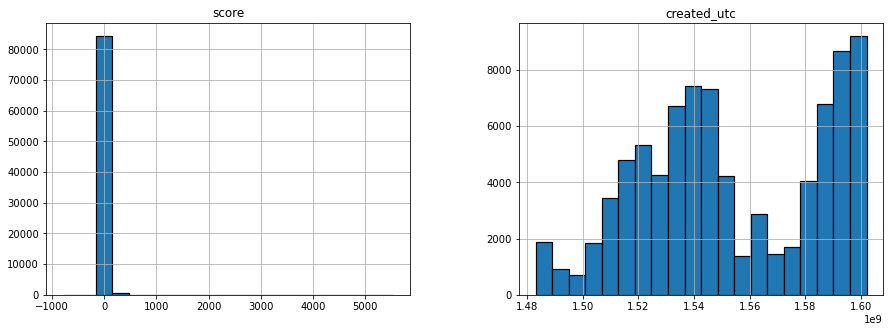

In [14]:
comments.hist(figsize=(15,5), bins=20, edgecolor="black", linewidth=1.2)
plt.show()

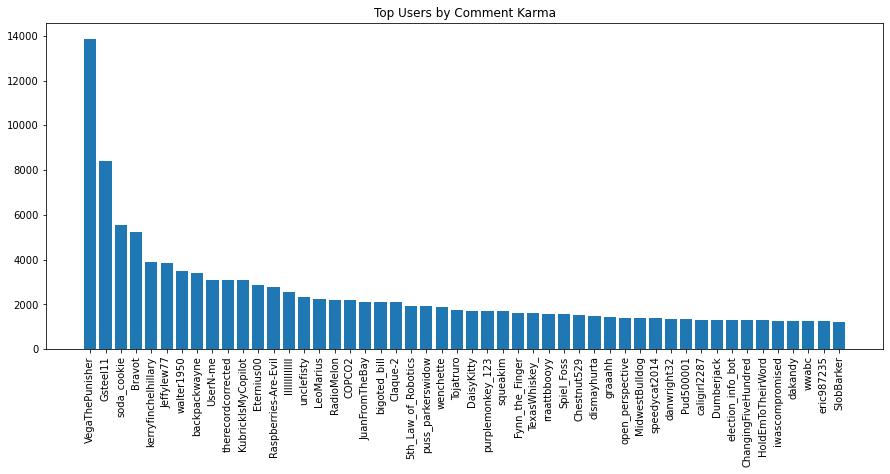

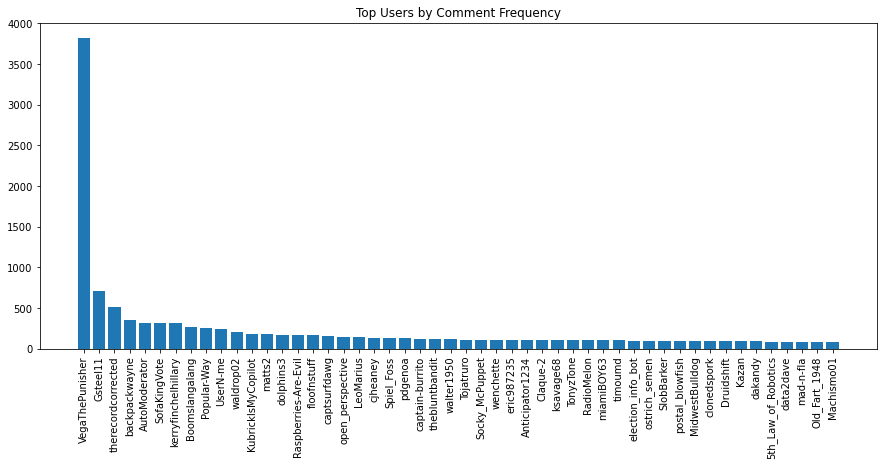

In [15]:
top_users = comments.groupby(["author"])['score'].sum().reset_index().sort_values('score', ascending=False)
users_top = top_users["author"].values[0:50]
scores_top = top_users["score"].values[0:50]

user_comment_counts = comments["author"].value_counts().sort_values(ascending=False)
users_freq = user_comment_counts.index.values[0:50]
scores_freq = user_comment_counts.values[0:50]

plt.figure(figsize=(15,6))
plt.title("Top Users by Comment Karma")
plt.bar(users_top, scores_top)
plt.xticks(users_top, rotation=90)
plt.show()


plt.figure(figsize=(15,6))
plt.title("Top Users by Comment Frequency")
plt.bar(users_freq, scores_freq)
plt.xticks(users_freq, rotation=90)
plt.show()

In [ ]:
all_top_users = np.arange(1,len(top_users["author"].values)+1,1)
all_top_scores = top_users["score"].values

all_freq_users = np.arange(1,len(user_comment_counts.index.values)+1,1)
all_freq_scores = user_comment_counts.values

plt.figure(figsize=(15,7))

plt.subplot(2,1,1)
plt.title("All Users by Comment Karma")
plt.plot(all_top_users , all_top_scores)
plt.xscale("log")


plt.subplot(2,1,2)
plt.title("All Users by Comment Frequency")
plt.plot(all_freq_users, all_freq_scores)
plt.xscale("log")
plt.show()